In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
22403,NaN,NaN,NaN,NaN,NaN,NaN
22404,NaN,NaN,NaN,NaN,NaN,NaN
22405,NaN,NaN,NaN,NaN,NaN,NaN
22406,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of brands: ", len(list(set(df['Brand Name']))))

print("=======================================================================")

print("\nTotal number of unique products: ", len(list(set(df['Product Name']))))

print("=======================================================================")

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df[df['Rating']==3]["Reviews"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['Rating']>3]["Reviews"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['Rating']<3]["Reviews"].count()/len(df)*100))
print("=======================================================================")

Summary statistics of numerical features : 
             Price       Rating  Review Votes
count  9306.00000  9999.000000   9675.000000
mean    119.19659     3.645765      1.691886
std      81.67850     1.622854      9.849060
min      17.95000     1.000000      0.000000
25%      53.00000     2.000000      0.000000
50%     100.00000     4.000000      0.000000
75%     161.06000     5.000000      1.000000
max    2000.00000     5.000000    366.000000

Total number of reviews:  22408

Total number of brands:  35

Total number of unique products:  126

Percentage of reviews with neutral sentiment : 3.71%

Percentage of reviews with positive sentiment : 28.44%

Percentage of reviews with negative sentiment : 12.47%


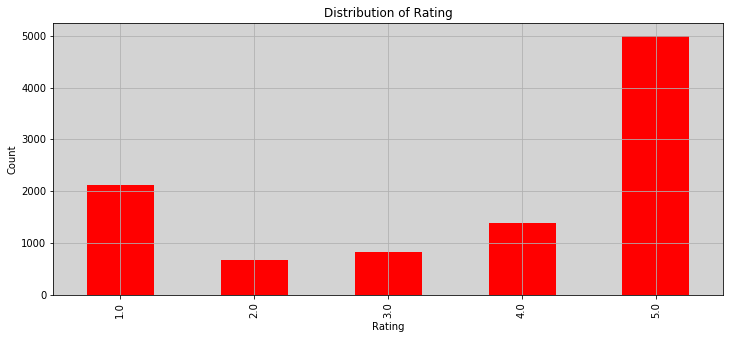

In [4]:
plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar',color = 'red')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("lightgrey")

In [5]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
7488,Apple iPhone 4 16GB (Black) - AT&T,Apple,208.79,1.0,Next Time you sell something you should have t...,27.0,0
7222,Apple iPhone 4 16GB (Black) - AT&T,Apple,208.79,4.0,"I bought this phone over 30 days ago and so, f...",0.0,1
1876,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,292.98,5.0,Awesome phone the sound on this is really cris...,1.0,1
154,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,Jethro,79.99,1.0,phone reception poor with incoming calls,1.0,0
9187,Apple iPhone 4 32GB (White) - Verizon,Apple,115.00,5.0,Luv it!!!,0.0,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 598 training examples and 67 validation examples. 

Show a review in the training set : 
 The phone works great! Battery & screen are as new!


(4658    Good price, purchased it for music/ipod substi...
 7489    I am not a HUGE Apple guy, but I can't imagine...
 6137    I bought one it works only one and have month ...
 4102    Would not hold a charge. Would get hot when in...
 3675    The phone was like new, and works perfect, tha...
                               ...                        
 5445                         Screen cracked really quick.
 4946    The phone would not get service. I purchased 3...
 5142    my first 3G came severely discounted with the ...
 1963    I’m not going to get into too many explicit sp...
 7638                                  Thanks it work well
 Name: Reviews, Length: 598, dtype: object,
 4658    1
 7489    1
 6137    0
 4102    0
 3675    1
        ..
 5445    0
 4946    0
 5142    1
 1963    1
 7638    1
 Name: Sentiment, Length: 598, dtype: int32)

In [7]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [8]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 the phone works great battery screen are as new


In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 3000 

Show some feature names : 
 ['aaa', 'forth', 'properly']


MultinomialNB()

In [10]:
pickle.dump(countVect,open('countVect.pkl','wb'))

In [11]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    pl.matshow(cm)


Accuracy on validation set: 0.8060

AUC score : 0.7292

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.46      0.63        24
           1       0.77      1.00      0.87        43

    accuracy                           0.81        67
   macro avg       0.88      0.73      0.75        67
weighted avg       0.85      0.81      0.78        67


Confusion Matrix : 
 [[11 13]
 [ 0 43]]


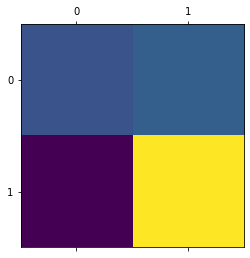

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pylab as pl
from sklearn.metrics import roc_auc_score, accuracy_score
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)

In [13]:
mnb

MultinomialNB()

In [14]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model.pkl','wb'))

In [15]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

In [16]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print("========================================")
print('X_test shape:', X_test_seq.shape)
print("========================================")
print('y_train shape:', y_train_seq.shape)
print("========================================")
print('y_test shape:', y_test_seq.shape)
print("========================================")

X_train shape: (598, 100)
X_test shape: (67, 100)
y_train shape: (598, 2)
y_test shape: (67, 2)


In [17]:
model1 = Sequential()
model1.add(Embedding(top_words, 128))
model1.add(LSTM(128, dropout=0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compile LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, verbose=1)

# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 2,691,842
Trainable params: 2,691,842
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 27ms/step - loss: 0.6203 - accuracy: 0.6418
Test loss : 0.6203
Test accuracy : 0.6418


In [18]:
model1.layers[0].get_weights()[0]
print("Size of weight matrix in the embedding layer : ", \
      model1.layers[0].get_weights()[0].shape)

# get weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
      model1.layers[1].get_weights()[0].shape)

# get weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
      model1.layers[2].get_weights()[0].shape)

Size of weight matrix in the embedding layer :  (20000, 128)
Size of weight matrix in the hidden layer :  (128, 512)
Size of weight matrix in the output layer :  (128, 2)
